In [7]:
import seaborn as sns
from datetime import datetime, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [8]:
### Load Data and Set up Data Frame ###

df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')

# Extreme dates for the continuous well data
min_date = datetime(2006,2,7)
max_date = datetime(2017,6,6)

# Restrict data to those dates
df = df.loc[(df.date >= min_date) & (df.date <= max_date)].copy()

# Drop 'date' column
df.drop(columns = ['date'])

# Set Date Range
date_rng = pd.date_range(start='2006-02-07', end='2017-06-06', freq='D')

# Set the index to be the DatetimeIndex
df.index = date_rng

# Check Freq (should be 'Day')
df.index.freq

<Day>

In [9]:
df_2 = df
df_2= df_2.drop(df.columns[0:1], axis=1)
df_2= df_2.reset_index(drop=True)
df_2
df_2["avg_well_depth"]

0       91.0100
1       91.0429
2       91.1096
3       91.1954
4       91.3012
         ...   
4133    79.9221
4134    80.1263
4135    80.1322
4136    80.0250
4137    80.2461
Name: avg_well_depth, Length: 4138, dtype: float64

In [10]:
df = df.drop(df.columns[0:2], axis=1)
df= df.reset_index(drop=True)
print (df)


      gage_ht  discharge_cfs  prcp   temp_avg  temp_max  temp_min  \
0       21.65         9420.0   0.0  35.722500     46.31     28.26   
1       21.64         9380.0   0.0  35.124167     42.46     28.72   
2       21.58         9210.0   0.0  32.172500     43.05     24.44   
3       21.46         8830.0   0.0  31.252083     42.04     24.33   
4       21.36         8550.0   0.0  30.429583     42.46     21.51   
...       ...            ...   ...        ...       ...       ...   
4133    23.38        15400.0   0.0  64.462917     74.62     53.69   
4134    23.42        15500.0   0.0  69.525417     82.78     54.14   
4135    23.38        15400.0   0.0  59.844167     69.58     52.63   
4136    23.25        14900.0   0.0  60.235417     73.53     46.36   
4137    22.76        13100.0   0.0  67.672917     83.37     52.45   

          hPa_avg    hum_avg  hum_max  hum_min  wind_avg  wind_max  wind_min  \
0     1028.625000  76.375000     93.0     47.0  5.826667     10.29      3.36   
1     1026.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df, df_2['avg_well_depth'], test_size=0.2, random_state=42)


In [12]:
# 1. Feature Engineering: Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# Predictions on test set
X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')

Mean Squared Error (Polynomial Regression): 5.691517991715661


In [13]:
# 2. Model Complexity: Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions on test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Squared Error (Random Forest): 4.568451178145576


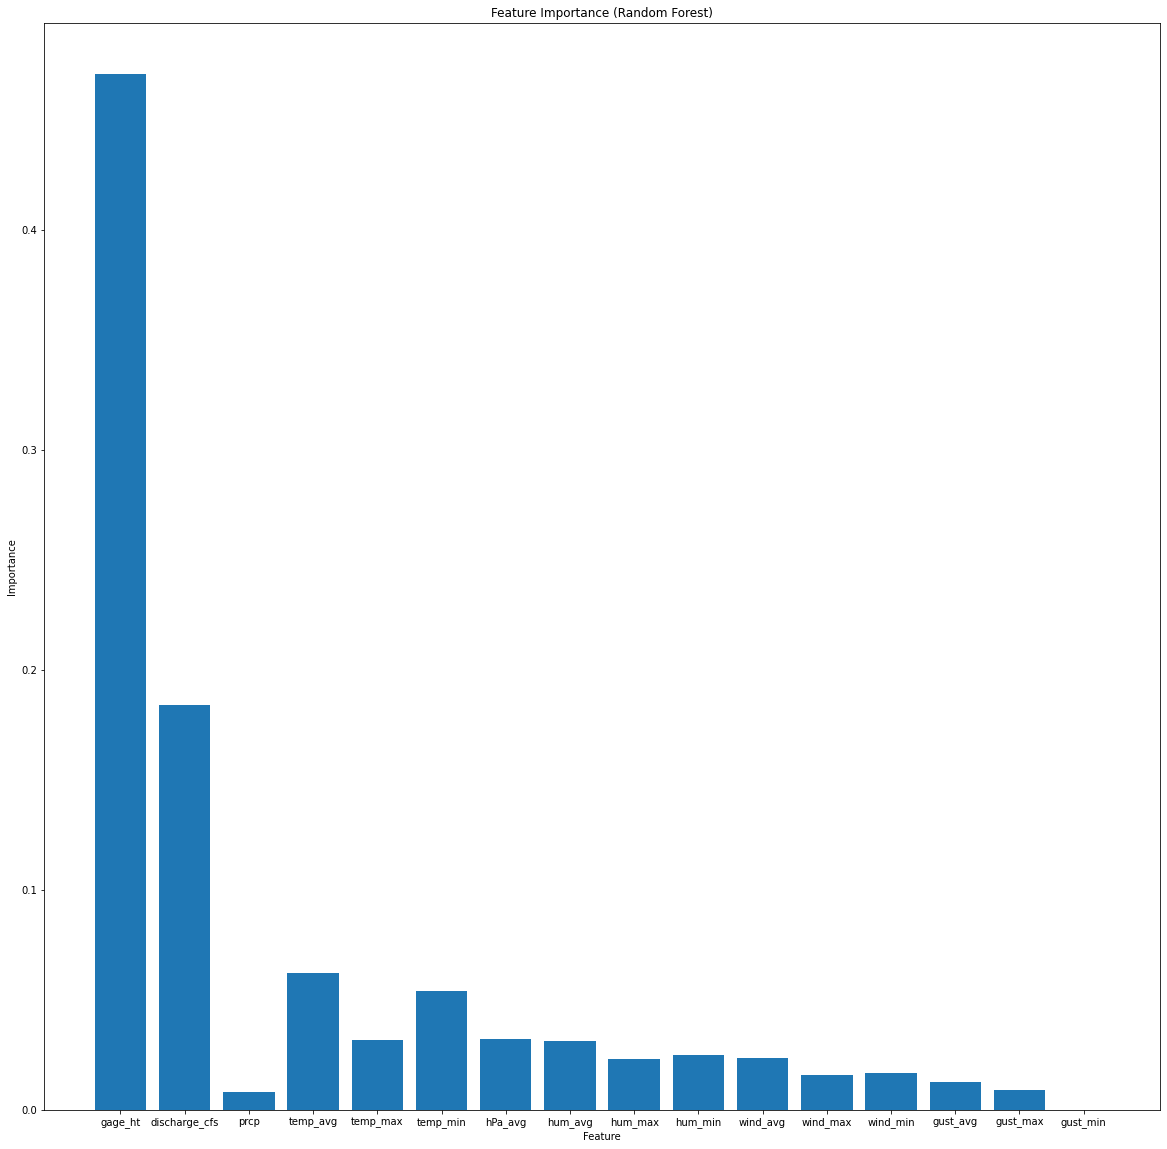

In [14]:
# 3. Feature Importance (Random Forest)
feature_importance = model_rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(20,20))
plt.bar(df.columns[:], feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

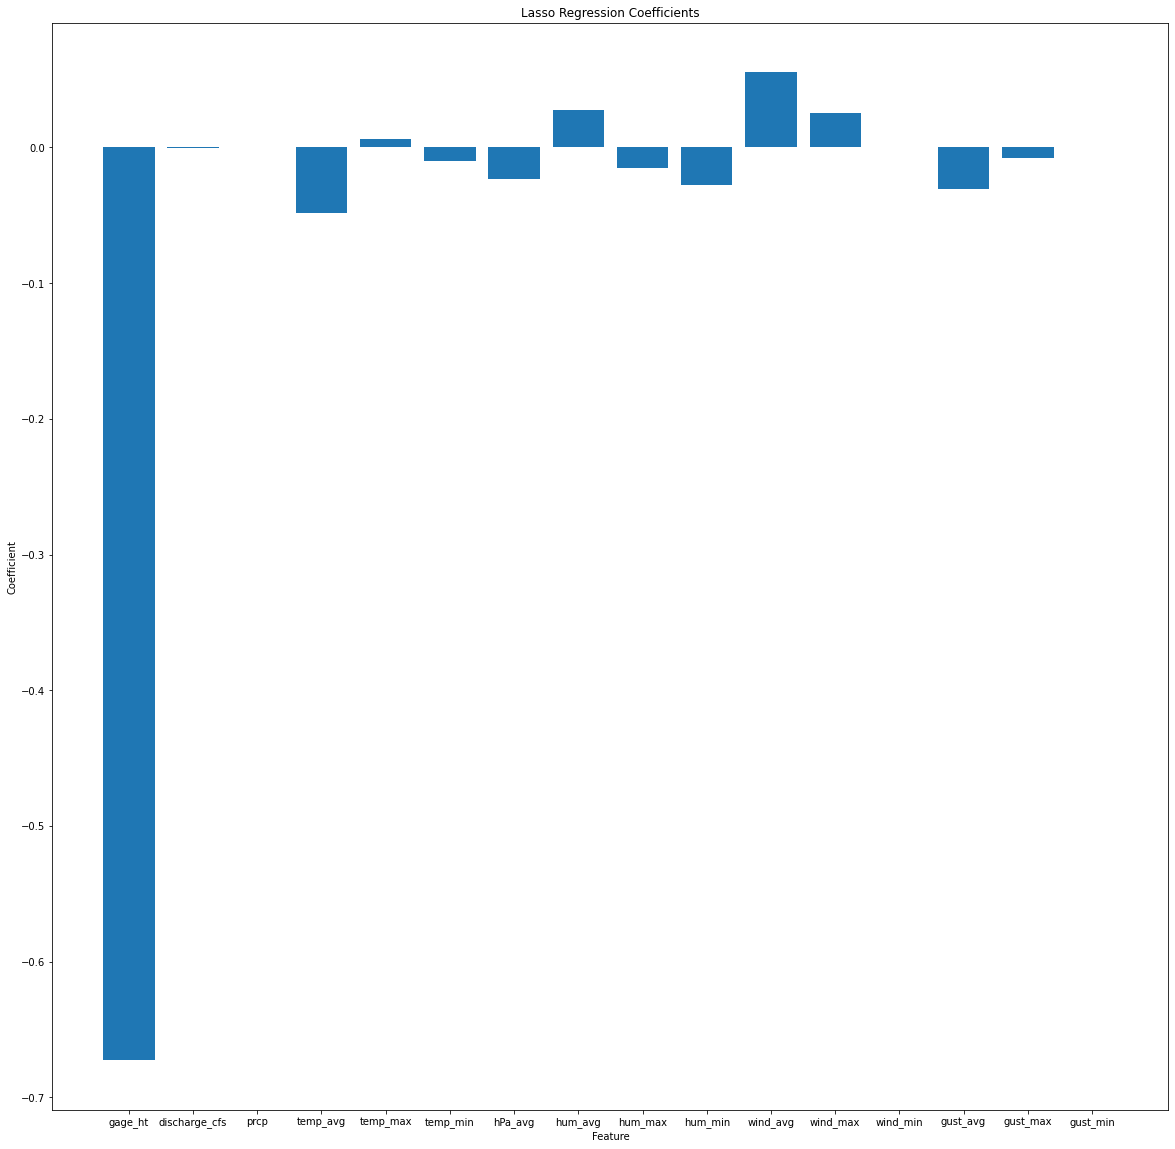

In [15]:
# 4. Regularization Techniques: Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

# Get coefficients
coefficients_lasso = model_lasso.coef_

# Plot coefficient values
plt.figure(figsize=(20,20))
plt.bar(df.columns[:], coefficients_lasso)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

In [16]:
# 5. Cross-validation (Random Forest)
cv_scores = cross_val_score(model_rf, df, df_2['avg_well_depth'], cv=5, scoring='neg_mean_squared_error')
cv_mse_rf = -np.mean(cv_scores)
print(f'Cross-validated Mean Squared Error (Random Forest): {cv_mse_rf}')

Cross-validated Mean Squared Error (Random Forest): 8.089642256976727
